<a href="https://colab.research.google.com/github/Sourav7490/ma22c046_2023_PL/blob/main/Assignment-6/k_Nearest_Neighbors8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
P = np.array([[0,0], [0.2, 0.22], [0.1, -0.1],

[1,1], [1.1, 0.9], [0.8, 0.9], [1.1, 0.63],
[0.58, -0.1], [0.63, 0.1], [0.67, -0.3], [0.8,-0.23],
[0.8, 0.6]])
k = 3

In [5]:
diff= P[:, np.newaxis, :] - P[np.newaxis, :, :] # Here we compute the differences the coordinates
diff.shape

(12, 12, 2)

In [7]:
sq_diff = diff ** 2
sq_diff.shape

(12, 12, 2)

In [8]:
dist_sq = sq_diff.sum(-1)
dist_sq.shape

(12, 12)

In [9]:
nearest = np.argsort(dist_sq, axis=1) #The left side columns will then give the indices of the nearest neighbors
print(nearest)

[[ 0  2  1  7  8  9 10 11  5  6  3  4]
 [ 1  0  2  8  7  9 11 10  5  6  3  4]
 [ 2  0  1  7  8  9 10 11  5  6  4  3]
 [ 3  4  5  6 11  8  1  7 10  9  0  2]
 [ 4  3  6  5 11  8  7  1 10  9  2  0]
 [ 5  3  4 11  6  8  1  7 10  0  9  2]
 [ 6  4 11  3  5  8  7 10  1  9  2  0]
 [ 7  8  9 10  2  1  0 11  6  5  4  3]
 [ 8  7 10  9  1 11  2  0  6  5  4  3]
 [ 9 10  7  8  2  1  0 11  6  5  4  3]
 [10  9  7  8  2  1 11  0  6  5  4  3]
 [11  5  6  4  3  8  1  7 10  9  2  0]]


In [12]:
nearest_partition = np.argpartition(dist_sq, k + 1, axis=1)
print(nearest_partition)

[[ 1  7  2  0  8  9 10 11  6  4  3  5]
 [ 0  1  2  8  7  9 11  6  4  3 10  5]
 [ 1  7  2  0  8  9 10 11  6  4  3  5]
 [ 4  5  6  3 11  1  2  7  8  9 10  0]
 [ 4  5  6  3 11  1  2  7  8  9 10  0]
 [ 3  5  4 11  6  8  7  1 10  0  9  2]
 [ 4 11  6  3  5  1  2  7  8  9 10  0]
 [ 7  8  9 10  2  1  0 11  6  4  3  5]
 [ 8  7 10  9  1 11  2  0  6  4  3  5]
 [ 9 10  7  8  2  1  0 11  6  4  3  5]
 [ 9 10  7  8  2  1 11  0  6  4  3  5]
 [11  5  6  4  3  8  1  7 10  9  2  0]]


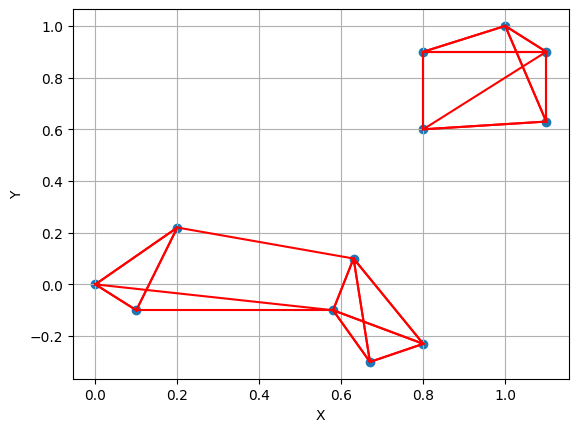

In [17]:
import matplotlib.pyplot as plt
plt.scatter(P[:, 0], P[:, 1])
K = 3

for i in range(P.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        plt.plot(*zip(P[j], P[i]), color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()